In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
# Count Number of samples in each class (0 - notumor), (1 - glioma), (2 - meningioma) and (3 - pituitary)

number_of_each_class = {}

directories = '/kaggle/input/brain-tumor-mri-dataset/Training'

for folder in os.listdir(directories):
    number_of_each_class[folder] = len(os.listdir(os.path.join(directories,folder)))
    

In [3]:
number_of_each_class

{'pituitary': 1457, 'notumor': 1595, 'meningioma': 1339, 'glioma': 1321}

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
from keras.models import Sequential

2024-02-09 01:44:40.779186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 01:44:40.779236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 01:44:40.780730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Model Building

In [14]:
#CNN Model
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 27, 27, 128)      

In [15]:
from keras.optimizers import Adam
model.compile(optimizer= Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [16]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=8, verbose=1, mode='auto')

# **Split Data:**
*    ***Train:80%***
*    ***Val:20%***

In [8]:
import tensorflow as tf
class_labels = {'notumor':0,'glioma':1,'meningioma':2,'pituitary':3}

def preprocessing_images(imgs_path):
    features = []
    labels = []
    
    for label in os.listdir(imgs_path):
        path = os.path.join(imgs_path,label)
        if label in class_labels:
            label = class_labels[label]
    
        for image in os.listdir(path):
            img_path = os.path.join(path,image)
            
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array /= 255.0
            
            features.append(img_array)
            labels.append(label)
    return np.array(features), np.array(labels)

In [9]:
X,y = preprocessing_images(directories)

In [10]:
len(X)

5712

In [11]:
len(y)

5712

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Model Training

In [18]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    callbacks=[early_stop],
    validation_data=(X_val,y_val),
    batch_size=32
)

Epoch 1/30


2024-02-09 01:57:47.738317: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


152/152 [==============================] - 19s 99ms/step - loss: 0.6907 - accuracy: 0.7143 - val_loss: 0.3879 - val_accuracy: 0.8623
Epoch 2/30
152/152 [==============================] - 12s 82ms/step - loss: 0.3382 - accuracy: 0.8789 - val_loss: 0.2955 - val_accuracy: 0.9090
Epoch 3/30
152/152 [==============================] - 12s 82ms/step - loss: 0.1896 - accuracy: 0.9314 - val_loss: 0.2076 - val_accuracy: 0.9288
Epoch 4/30
152/152 [==============================] - 13s 82ms/step - loss: 0.1316 - accuracy: 0.9547 - val_loss: 0.1914 - val_accuracy: 0.9487
Epoch 5/30
152/152 [==============================] - 13s 83ms/step - loss: 0.0888 - accuracy: 0.9654 - val_loss: 0.2175 - val_accuracy: 0.9323
Epoch 6/30
152/152 [==============================] - 13s 82ms/step - loss: 0.0676 - accuracy: 0.9757 - val_loss: 0.1923 - val_accuracy: 0.9335
Epoch 7/30
152/152 [==============================] - 12s 82ms/step - loss: 0.0520 - accuracy: 0.9808 - val_loss: 0.2113 - val_accuracy: 0.9393
Epo

In [40]:
classes = {0:'notumor',1:'glioma',2:'meningioma',3:'pituitary'}

In [42]:
classes.get(0)

'notumor'

# Ploting Data

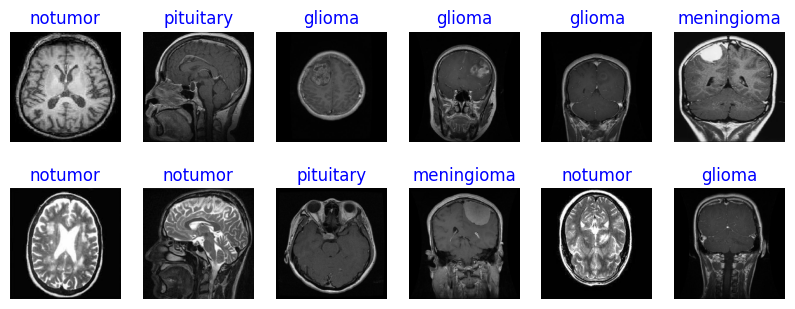

In [50]:
import random

# Define the number of images to plot
num_images_to_plot = 12

# Get random indices to select random images
random_indices = random.sample(range(len(X_train)), num_images_to_plot)

# Plot the images
plt.figure(figsize=(10, 20))
for i, index in enumerate(random_indices, 1):
    plt.subplot(10, 6, i)
    plt.imshow(X_train[index])
    plt.title(f'{classes.get(y_train[index])}', color='blue')
    plt.axis('off')

plt.show()

# Ploting Curves

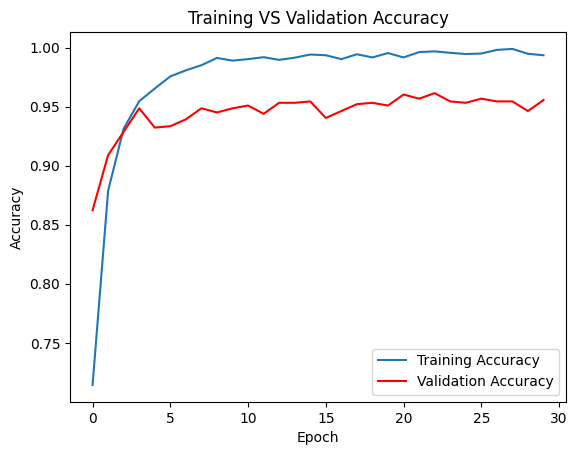

In [54]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels and title
plt.title('Training VS Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


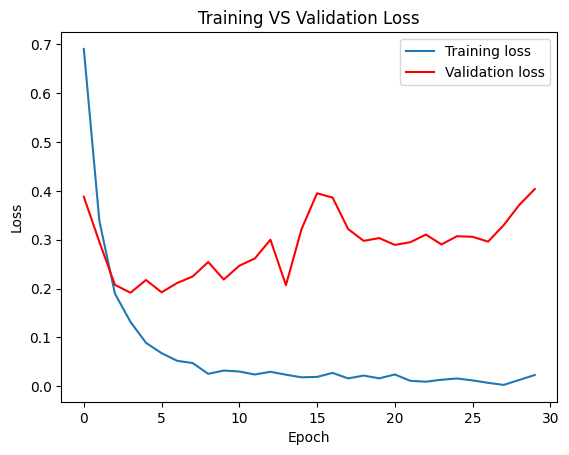

In [55]:
# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Validation loss')

# Add labels and title
plt.title('Training VS Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


# Testing Data

In [57]:
X_test,y_test = preprocessing_images("/kaggle/input/brain-tumor-mri-dataset/Testing")

# Model Evaluation

In [58]:
Train_sc = model.evaluate(X_train,y_train)
Valid_sc = model.evaluate(X_val,y_val)
Test_sc = model.evaluate(X_test,y_test)
#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Valid_sc[0], '\n')

41/41 [==============================] - 1s 36ms/step - loss: 0.3338 - accuracy: 0.9558
Train Scores : 
    accuracy: 0.9997940063476562 
      Loss:  0.0013022728962823749 

Valid Scores : 
    accuracy: 0.9556592702865601 
      Loss:  0.40365979075431824 

Test Scores : 
    accuracy: 0.9557589888572693 
      Loss:  0.40365979075431824 



# Model Predictions

In [59]:
y_pred =np.argmax(model.predict(X_test), axis = 1)

41/41 [==============================] - 1s 17ms/step


In [60]:
y_pred

array([3, 3, 3, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Matrix')

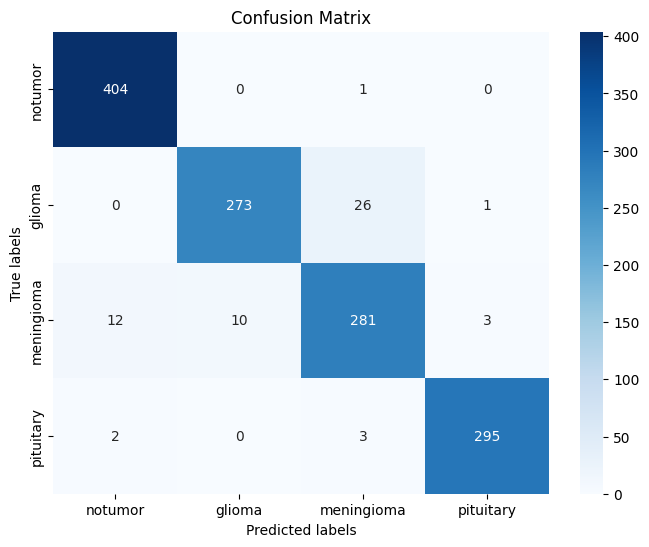

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [68]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

# Print the classification report
print(report)

              precision    recall  f1-score   support

     notumor       0.97      1.00      0.98       405
      glioma       0.96      0.91      0.94       300
  meningioma       0.90      0.92      0.91       306
   pituitary       0.99      0.98      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311

